In [1]:
import numpy as np 
import pandas as pd 


import os 
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./data/test.csv
./data/train.csv
./data/gender_submission.csv


In [2]:
train_data = pd.read_csv("data/train.csv", index_col= "PassengerId")
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv", index_col= "PassengerId")
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
data = train_data.drop(["Name","Ticket","Cabin"], axis= 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [9]:
data = data.dropna()

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data["Embarked"] = ordinal_encoder.fit_transform(data[["Embarked"]])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,2.0
2,1,1,female,38.0,1,0,71.2833,0.0
3,1,3,female,26.0,0,0,7.9250,2.0
4,1,1,female,35.0,1,0,53.1000,2.0
5,0,3,male,35.0,0,0,8.0500,2.0


In [11]:
data["Embarked"].value_counts()

2.0    554
0.0    130
1.0     28
Name: Embarked, dtype: int64

In [12]:
data["Sex"] = data["Sex"].map({"male" : 1 , "female": 0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2.0
2,1,1,0,38.0,1,0,71.2833,0.0
3,1,3,0,26.0,0,0,7.9250,2.0
4,1,1,0,35.0,1,0,53.1000,2.0
5,0,3,1,35.0,0,0,8.0500,2.0


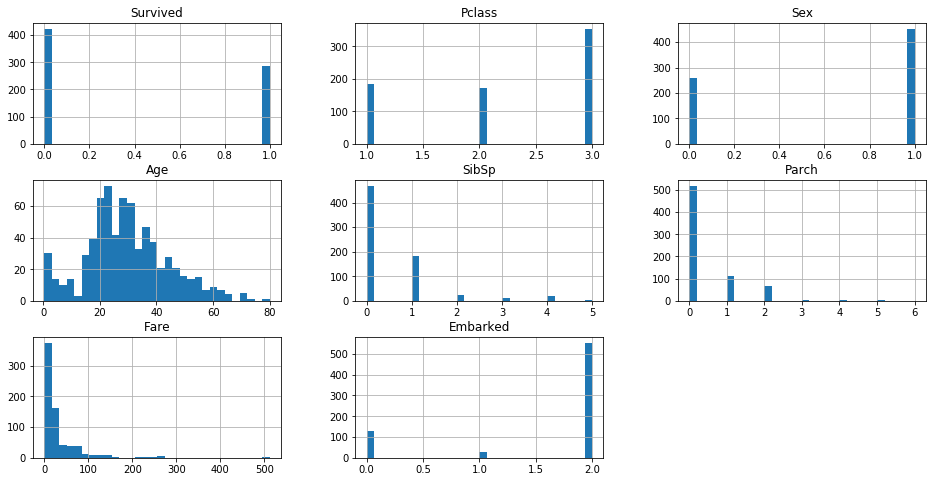

In [15]:
from matplotlib import pyplot as plt

data.hist( bins = 30, figsize=(16,8))
plt.show()

In [16]:
corr_matri = data.corr()
corr_matri["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.266100
Parch       0.095265
SibSp      -0.015523
Age        -0.082446
Embarked   -0.181979
Pclass     -0.356462
Sex        -0.536762
Name: Survived, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

train_test, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
473,1,2,0,33.0,1,2,27.7500,2.0
433,1,2,0,42.0,1,0,26.0000,2.0
667,0,2,1,25.0,0,0,13.0000,2.0
31,0,1,1,40.0,0,0,27.7208,0.0
292,1,1,0,19.0,1,0,91.0792,0.0


In [18]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 473 to 132
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  569 non-null    int64  
 1   Pclass    569 non-null    int64  
 2   Sex       569 non-null    int64  
 3   Age       569 non-null    float64
 4   SibSp     569 non-null    int64  
 5   Parch     569 non-null    int64  
 6   Fare      569 non-null    float64
 7   Embarked  569 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 56.2 KB


In [20]:
from sklearn.tree import DecisionTreeClassifier

clasificador = DecisionTreeClassifier()

In [24]:
y = train_test.pop("Survived")
clasificador.fit(X= train_test, y = y)

DecisionTreeClassifier()

In [25]:
res = test_set.pop("Survived")
clasificador.predict(X=test_set)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [31]:
res

PassengerId
642    1
497    1
263    0
312    1
552    0
      ..
363    0
57     1
138    0
652    1
75     1
Name: Survived, Length: 143, dtype: int64

In [29]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
642,1,0,24.0,0,0,69.3000,0.0
497,1,0,54.0,1,0,78.2667,0.0
263,1,1,52.0,1,1,79.6500,2.0
312,1,0,18.0,2,2,262.3750,0.0
552,2,1,27.0,0,0,26.0000,2.0


# Se prepara los datos de entrenamiento

In [34]:
test = test_data.drop(["Name","Ticket","Cabin"], axis= 1)
test.head()

test["Sex"] = test["Sex"].map({"male" : 1 , "female": 0})
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,Q
893,3,0,47.0,1,0,7.0000,S
894,2,1,62.0,0,0,9.6875,Q
895,3,1,27.0,0,0,8.6625,S
896,3,0,22.0,1,1,12.2875,S


In [35]:
test = test.dropna()

In [36]:
ordinal_encoder = OrdinalEncoder()
test["Embarked"] = ordinal_encoder.fit_transform(test[["Embarked"]])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1.0
893,3,0,47.0,1,0,7.0000,2.0
894,2,1,62.0,0,0,9.6875,1.0
895,3,1,27.0,0,0,8.6625,2.0
896,3,0,22.0,1,1,12.2875,2.0


In [37]:
clasificador.predict(X=test)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,